In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
from src.api_functions import *
from src.cleaning_functions import *
from src.visual_functions import *
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pylab import mpl

In [2]:
csv_1 = 'output/dfinal.csv' # Current population values
csv_2 = 'output/dfinal_coords.csv' # Countries coordinates
csv_3 = 'output/energy-var.csv' # Interannual variation of energy consumption
csv_4 = 'output/pop_avg_rate.csv' # Population interannual variation / average rate
csv_5 = 'output/table-1-elec.csv' # Electricity production at init
csv_6 = 'output/table-2-share.csv' # Energy production tecnologies share at init
csv_7 = 'output/table-3-capita.csv' # Energy consumption init

In [3]:
db1 = load_csv(csv_1)
db2 = load_csv(csv_2)
db3 = load_csv(csv_3)
db4 = load_csv(csv_4)
db5 = load_csv(csv_5)
db6 = load_csv(csv_6)
db7 = load_csv(csv_7)

In [4]:
db1.sample(2)

,country,population,ranking,world_share,coordinates
82,Tokelau,1357,234,0.000017,"S9°0'0"" O172°0'0"""
37,Laos,7275560,105,0.093333,"N18°0'0"" E105°0'0"""


In [5]:
db2.sample(2)

,country,0,1
13,Nepal,"N28°0'0""","E84°0'0"""
42,Costa Rica,"N10°0'0""","O84°0'0"""


In [6]:
db3.sample(2)

,country,population_x,ranking,world_share,energy_cons_change_twh,energy_per_capita,population_y,primary_energy_consumption
16,Belarus,9449323,96,0.121219,-3.360500,32611.843486,9.746700e+06,318.824600
81,Hong Kong,7496981,104,0.096174,5.898389,27768.763382,5.694673e+06,173.600945


In [7]:
db4.sample(2)

,country,population,ranking,world_share,GrowthRate
48,Burkina Faso,20903273,59,0.268155,1.977467
199,Saint Helena,6077,229,0.000078,-0.103300


In [18]:
db4.shape

(204, 5)

In [8]:
db5=db5.drop(['Unnamed: 0'], axis=1, inplace=False)
db5.sample(2)

,country,year,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,low_carbon_electricity
25,Poland,2020,157.388,6.831,109.903,130.772,16.417,2.022,0.0,4.452,6.831,0.0,26.617,2.079,15.685,26.617
0,China,2020,7623.696,129.640,4631.215,5044.957,253.425,1355.200,366.2,160.317,129.740,0.1,2212.540,261.100,466.500,2578.740


In [9]:
db6=db6.drop(['Unnamed: 0'], axis=1, inplace=False)
db6.sample(2)

,country,world_share,year,biofuel_share_elec,coal_share_elec,fossil_share_elec,gas_share_elec,hydro_share_elec,low_carbon_share_elec,nuclear_share_elec,oil_share_elec,other_renewables_share_elec,renewables_share_elec,solar_share_elec,wind_share_elec
47,Bulgaria,0.089137,2020,3.695,33.498,40.156,5.559,7.353,59.844,41.253,1.098,3.695,18.591,3.886,3.658
1,India,17.703184,2020,1.071,70.563,74.456,3.883,12.185,25.544,3.320,0.010,1.161,22.224,4.376,4.502


In [10]:
db7=db7.drop(['Unnamed: 0'], axis=1, inplace=False)
db7.sample(2)

,country,population_x,world_share,biofuel_elec_per_capita,coal_elec_per_capita,fossil_cons_per_capita,gas_elec_per_capita,hydro_elec_per_capita,low_carbon_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,other_renewables_elec_per_capita,per_capita_electricity,renewables_elec_per_capita,renewables_share_elec,solar_elec_per_capita,wind_elec_per_capita
15,Thailand,69799978,0.895419,263.778,496.743,2038.061,1531.152,65.896,447.281,0.0,10.165,263.778,2485.342,447.281,17.997,69.986,47.622
35,Bolivia,11673021,0.149746,23.045,0.000,507.235,507.235,249.722,299.821,0.0,0.000,23.045,807.056,299.821,37.150,21.573,5.482


In [11]:
x = db1['population']

In [16]:
len(x)

83

In [17]:
len(y)

204

In [12]:
db4.GrowthRate = db4.GrowthRate.astype(int)

In [13]:
y = np.multiply(db1['population'],db4['GrowthRate'])

/mnt/c/Ironhack/Material/Repositorio/Proyecto_3/src/visual_functions.py:28: RuntimeWarning: overflow encountered in long_scalars
  return_k=(size*sum_xy-sum_x*sum_y)/(size*sum_sqare_x-sum_x*sum_x)


ValueError: x and y must be the same size

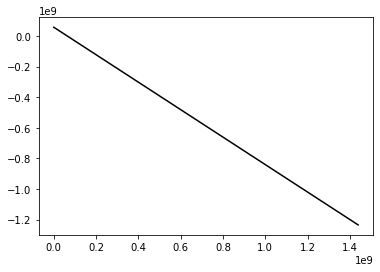

In [14]:
parameter = liner_fitting(x,y)
draw_data = calculate_lin(x,parameter[0],parameter[1])
draw_lin(x,draw_data,y)

In [15]:
data=polynomial_fitting(x,y)
parameters=calculate_parameter(data)
for w in parameters:
    print(w)
newData=calculate_bin(x,parameters)
draw_bin(x,newData,y)

-7.262039950895537e-10
1.0286014751259067
-4014080.9995436966


NameError: name 'calculate_bin' is not defined

In [ ]:
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
agrupado = penguins.groupby(["species"])["sex"].value_counts().unstack()
agrupado

In [ ]:
animals = penguins.species.unique() # ESTO ES UNA LISTA CON LOS NOMBRES 
fig = go.Figure(data=[
    go.Bar(name="Female", x=animals, y=agrupado.Female),
    go.Bar(name="Male", x=animals, y=agrupado.Male)
])
fig.show()